# Các cách xử lý ảnh phần 2 - Convolution và Subsampling
## MaSSP 2017, Computer Science

__Chuẩn bị: Xếp Châu__

Một số hình ảnh minh họa lấy từ https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/. 

Trong lab này, chúng ta sẽ củng cố kiến thức về Subsampling và Convolution trong CNN thông qua các bài tập về xử lý ảnh. 
1. (Cách chuyển ảnh màu sang đen trắng)
2. (Subsampling)
3. (Convolution)
    * Bước Convolution, các filter thông dụng
    * Non-linearity

Để hoàn thành cái bài tập trong lab này, các bạn hãy vận dụng các phương pháp biến đổi ma trận đã học. Sau đó hãy tham khảo các hàm có sẵn trong thư viện __numpy__, __matplotlib__, và __TensorFlow__. 

Numpy: https://docs.scipy.org/doc/numpy/reference/index.html

Matplotlib: http://matplotlib.org/contents.html

TensorFlow: https://www.tensorflow.org/api_guides/python/image 

## 1. Cách chuyển ảnh màu sang đen trắng
Đầu tiên hãy import các thư viện quen thuộc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp_image
import tensorflow as tf
import math

sess = tf.InteractiveSession()

Để thực hiện lab này, bạn hãy chọn một bức ảnh màu bất kì hoặc sử dụng bức ảnh Văn Miếu dưới đây. Hãy nhớ chuyển hóa ảnh thành 3 kênh màu RGB.

In [2]:
image = mp_image.imread('../../images/Filters/vanmieu.png')
image = image[:, :, :3]
image.shape

(240, 360, 3)

Và plot hình ảnh bằng matplotlib.pyplot.

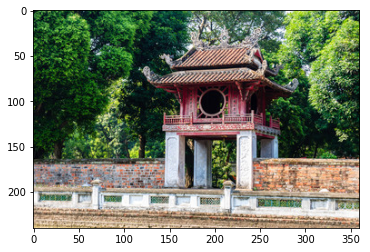

In [66]:
plt.imshow(image)
plt.show()

Để dễ dàng quan sát hiệu ứng ảnh, chúng ta sẽ sử dụng ảnh đen trắng (1 kênh) thay vì ảnh màu (3 kênh).

<img src="../../images/Filters/convert_to_gray.png" />

__Checkpoint 1__: Hãy viết hàm $convert\_to\_gray()$, nhận vào một ảnh màu và trả về một ảnh đen trắng. Biết công thức tính giá trị của điểm ảnh đen trắng theo 3 kênh màu là $Red*0.299 + Green*0.587 + Blue*0.114$.

In [19]:
def convert_to_gray(image):
    pass

In [ ]:
# Plot hình ảnh thu được
gray_image = convert_to_gray(image)
plt.imshow(gray_image, cmap='gray')
plt.show()

Hãy tìm trong thư viện TensorFlow một hàm có sẵn để chuyển đổi ảnh màu RGB sang ảnh đen trắng. Plot hình ảnh thu được và so sánh ma trận ảnh thu được của 2 cách.

In [ ]:
# dùng TensorFlow

In [ ]:
plt.imshow(im, cmap='gray')
plt.show()

Trong các phần tiếp theo, chúng ta sẽ minh họa các bước Subsampling và Convolution trong CNN. Đọc kĩ phần notes dưới đây mô tả lại CNN.

<center><img style="width: 935px; height: 223px" src="../../images/Filters/convnet.png" /></center>

__Mô tả lại toàn bộ CNN__

Sau bước Convolution thứ nhất thu được feature map với độ sâu là 3 (có nghĩa đã sử dụng 3 filter). 

Bước Pooling/Subsampling không làm thay đổi độ sâu nhưng thay đổi kích thước của feature map. 

Sau bước Convolution thứ 2 thu được feature map tiếp theo với độ sâu là 6, nghĩa là bước này sử dụng 6 filter. 

Tương tự, bước Subsampling thứ 2 cho feature map với cùng độ sâu nhưng kích thước nhỏ hơn. Feature map này được đưa vào DNN (2 hidden layers) và cho ra output prediction.

Bước Subsampling áp dụng sau 1 hoặc vài bước Convolution, và thậm chí bước Subsampling không xuất hiện trong một số network (bước Convolution có thể tự giảm kích thước feature map). Tuy nhiên do Subsampling dễ giải thích hơn, ta đi vào bước này trước.

__Mô tả lại convolution layer kèm kích thước ảnh (trước khi vào DNN)__

Ví dụ có kích ảnh ban đầu là 32x32x3 = 3096.

1st convolution: Dùng 3 filter, ví dụ kích thước mỗi filter là 5x5x3, thu được feature map với độ sâu là 3 kênh, ví dụ kích thước của output feature map là 32x32x3. Áp dụng ReLU lên feature map này.

1st pooling: số kênh là không đổi, kích cỡ feature map giảm xuống, ví dụ giảm xuống một nửa mỗi chiều, còn 16x16x3

2nd convolution: Dùng 6 filter, ví dụ kích thước mỗi filter là 5x5x3, thu được feature map với độ sâu là 6 kênh, ví dụ kích thước của output feature map là 16x16x6

2nd pooling: số kênh là không đổi, kích cỡ feature map giảm xuống, ví dụ còn 8x8x6 = 384. Như vậy số điểm đi vào Fully connected layer là 384, thay vì 3096 như trong DNN.

## 2. Pooling/Subsampling/Downsampling
<i>Áp dụng lên các feature maps thu được từ Convolution.</i>
### Các loại subsampling
* Max pooling
* Average pooling
* Sum pooling

<img src="../../images/Filters/max_pool.png" />

<center>Hình ảnh minh họa một ví dụ của __max pooling__</center>

### Mục đích của Subsampling
* bỏ qua một số giá trị không quan trọng (ví dụ max-pool chỉ lấy giá trị lớn nhất trong 1 vùng)
* giảm kích thước của feature maps, giúp tính toán ở các lớp sau nhanh hơn
* giúp network giải quyết biến dạng

### Ví dụ max pooling
<img style="float: right; width: 374px; height: 315px;" src="../../images/Filters/max_pool.png" />
<div style="border: 50px">
    <p> Tưởng tượng có một filter trượt theo ảnh từ trái qua phải, từ trên xuống dưới như bước Convolution. Filter này trả lại giá trị lớn nhất trong feature map nó bao phủ.</p> 
    <li><b>Input size</b> 4x4</li>
    <li><b>Filter size</b> 2x2</li>
    <li><b>Stride</b> 2</li>
    <li><b>Padding</b> 'VALID'</li>
</div>

<blockquote>Điều gì xảy ra khi stride size lớn hơn số điểm còn thừa ở sát bên phải? Ở dưới cùng?

### Padding = 'VALID'
Filter bỏ qua những điểm ở cuối không đủ để chứa filter.
<img style="width: 1000px; height: 150px;" src="../../images/Filters/valid_padding.png" />
* <b>Input size</b> 13x13
* <b>Filter size</b> 6x6
* <b>Stride</b> 5

Nguồn: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

In [23]:
# ví dụ cách dùng max pooling, padding VALID trong TensorFlow
max_pool_valid = tf.nn.max_pool(tf.ones((1, 13, 13, 1), dtype=tf.float32),
                                ksize=[1, 6, 6, 1],
                                strides=[1, 5, 5, 1], 
                                padding='VALID')
print(sess.run(tf.shape(max_pool_valid)))
print(sess.run(max_pool_valid))

[1 2 2 1]
[[[[ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]]]]


### Padding = 'SAME'
Thêm 0 đều vào viền (trái, phải, trên, dưới) sao cho tất cả các điểm đều được qua subsampling 
<img style="width: 1000px; height: 210px;" src="../../images/Filters/same_padding.png" />
* <b>Input</b> 13x13
* <b>Filter size</b> 6x6
* <b>Stride</b> 5

In [21]:
# ví dụ cách dùng max pooling, padding SAME trong TensorFlow
max_pool_same = tf.nn.max_pool(tf.ones((1, 13, 13, 1), dtype=tf.float32),
                                  ksize=[1, 6, 6, 1],
                                  strides=[1, 5, 5, 1], 
                                  padding='SAME')
print(sess.run(tf.shape(max_pool_same)))
print(sess.run(max_pool_same))

[1 3 3 1]
[[[[ 1.]
   [ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]
   [ 1.]]

  [[ 1.]
   [ 1.]
   [ 1.]]]]


__Checkpoint 2__: Viết hàm $max\_pool\_2x2()$, nhận một ảnh đen trắng, trả lại một ảnh đen trắng đã qua max pooling với stride 2 và cách padding là 'VALID'. Plot hình ảnh thu được và so sánh với gốc.

In [16]:
def max_pool_2x2(gray_image, stride=2, padding='VALID'):
    pass

In [ ]:
# Plot hình ảnh thu được
max_pooled_gray_image = max_pool_2x2(gray_image, stride=2)
plt.imshow(max_pooled_gray_image, cmap="gray")
plt.show()

__Checkpoint 3__: Hãy sửa hàm trên sao cho kết quả vẫn đúng khi stride khác 2 (nếu chưa đúng). Viết hàm $average\_pool\_2x2()$ tương tự, plot hình ảnh thu được và so sánh với ảnh từ $max\_pool\_2x2()$.

In [17]:
def average_pool_2x2(gray_image, stride=2, padding='VALID'):
    pass

In [ ]:
# Plot hình ảnh thu được
average_pooled_gray_image = average_pool_2x2(gray_image, stride=2)
plt.imshow(average_pooled_gray_image, cmap="gray")
plt.show()

__Checkpoint 4__: Hãy dùng hàm $tf.nn.max\_pool$ với những dữ liệu đầu vào hợp lý để thực hiện thao tác như hàm $max\_pool\_2x2()$.

In [ ]:
# dùng TensorFlow

## 3. Convolution

Bước convolution bao gồm 2 bước nhỏ:
* Áp dụng filter lên input
* Thêm non-linearity vào network bằng cách áp dụng non-linear activation function lên kết quả thu được ở bước trên, ví dụ ReLU 
<center><img style="width: 500px; height: 330px" src="../../images/Filters/convolution_layer.png" /></center>

Trong phần này, chúng ta sẽ chú trọng đến bước nhỏ đầu tiên, và sẽ sử dụng những filter sau đây để thay đổi ảnh.

<img style="width:384px; height:573px;" src="../../images/Filters/filter_matrices.png" />

In [19]:
edge_detect_kernel_1 = np.array([[1, 0, -1], 
                                 [0, 0, 0], 
                                 [-1, 0, 1]])
edge_detect_kernel_2 = np.array([[0, 1, 0], 
                                 [1, -4, 1], 
                                 [0, 1, 0]])
edge_detect_kernel_3 = np.array([[-1, -1, -1], 
                                 [-1, 8, -1], 
                                 [-1, -1, -1]])

blur_kernel_1 = np.ones((3, 3))/9.0
blur_kernel_2 = np.array([[1, 2, 1], 
                          [2, 4, 2], 
                          [1, 2, 1]])/16.0

sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

Ta sử dụng dictionary $kernels\_dict$ để map tên của kernel với ma trân của kernel tương ứng.

In [ ]:
kernels_dict = { "edge_detect_kernel_1": edge_detect_kernel_1, 
                 "edge_detect_kernel_2": edge_detect_kernel_2, 
                 "edge_detect_kernel_3":edge_detect_kernel_3,
                 "blur_kernel_1": blur_kernel_1, 
                 "blur_kernel_2": blur_kernel_2,
                 "sharpen_kernel": sharpen_kernel
               }

### 3.1 Convolution trong TensorFlow

Trong TensorFlow, hàm $conv2d$ cũng có thể nhận một trong hai giá trị cho __padding__: 'VALID' hoặc 'SAME'.

### Padding = 'VALID'
Filter bỏ qua những điểm ở cuối không đủ để chứa filter.
<img style="width: 1000px; height: 150px;" src="../../images/Filters/valid_padding.png" />
* <b>Input size</b> 13x13
* <b>Filter size</b> 6x6
* <b>Stride</b> 5

In [18]:
conv_valid = tf.nn.conv2d(tf.ones((1, 13, 13, 1), dtype=tf.float32), 
                               tf.ones((6, 6, 1, 10), dtype=tf.float32), 
                               strides=[1, 5, 5, 1], 
                               padding='VALID')
print(sess.run(tf.shape(conv_valid)))
print(sess.run(conv_valid))

[ 1  2  2 10]
[[[[ 36.  36.  36.  36.  36.  36.  36.  36.  36.  36.]
   [ 36.  36.  36.  36.  36.  36.  36.  36.  36.  36.]]

  [[ 36.  36.  36.  36.  36.  36.  36.  36.  36.  36.]
   [ 36.  36.  36.  36.  36.  36.  36.  36.  36.  36.]]]]


### Padding = 'SAME'
Thêm 0 đều vào viền (trái, phải, trên, dưới) sao cho tất cả các điểm đều được qua subsampling 
<img style="width: 1000px; height: 210px;" src="../../images/Filters/same_padding.png" />
* <b>Input</b> 13x13
* <b>Filter size</b> 6x6
* <b>Stride</b> 5

In [19]:
conv_same = tf.nn.conv2d(tf.ones((1, 13, 13, 1), dtype=tf.float32), 
                               tf.ones((6, 6, 1, 10), dtype=tf.float32), 
                               strides=[1, 5, 5, 1], 
                               padding='SAME')
print(sess.run(tf.shape(conv_same)))
print(sess.run(conv_same))

[ 1  3  3 10]
[[[[ 25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
   [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.]
   [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]]

  [[ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.]
   [ 36.  36.  36.  36.  36.  36.  36.  36.  36.  36.]
   [ 24.  24.  24.  24.  24.  24.  24.  24.  24.  24.]]

  [[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]
   [ 24.  24.  24.  24.  24.  24.  24.  24.  24.  24.]
   [ 16.  16.  16.  16.  16.  16.  16.  16.  16.  16.]]]]


Trong các phần tiếp theo, ta sẽ code hàm convolution từ đầu và hãy sử dụng cách padding 'VALID' và stride 1.

### 3.2 Convolution với ảnh đen trắng

__Checkpoint 5__: Hãy hoàn thành hàm $filter\_gray\_image$ nhận vào một kernel/filter có kích cỡ 3x3 như trên và một hình ảnh đen trắng, trả về một hình ảnh đen trắng mới sau khi quá trình convolution. Lưu ý giá trị của các pixel cần phải nằm trong khoảng từ 0 đến 1 nếu dạng dữ liệu là float, hoặc từ 0 đến 255 nếu dạng dữ liệu là int.

In [ ]:
def filter_gray_image(kernel, image):
    pass

Cho đoạn code sau để plot một hoặc nhiều hình ảnh tạo bởi các filter và hình ảnh gốc trong cùng một plot. Hãy chạy đoạn code tiếp theo để tạo ra plot này.

In [ ]:
# Plot hình ảnh thu được từ 1 kernel
def plot_filter_gray_image(kernel, image):
    plt.figure(figsize=(7, 3))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.axis('off')                # bỏ thông tin kích thước trục x và y
    plt.set_title("original")      # đặt tên cho subplot

    plt.subplot(122)
    plt.imshow(filter_gray_image(kernel, image), cmap='gray')
    plt.axis('off')
    plt.set_title("filtered")
    plt.show()

# Plot hình ảnh thu được từ nhiều kernel
def plot_filter_gray_images(kernels_dict, image):
    fig = plt.figure(figsize=(8, 24))
    for i, kernel_name in enumerate(sorted(kernels_dict.keys())):    # sort tên các kernel
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+1)
        plt.imshow(image, cmap='gray')
        a.set_title('Original')
        a.axis('off')
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+2)               # thêm subplot vào đúng vị trí
        plt.imshow(filter_gray_image(kernels_dict[kernel_name], image), cmap='gray')
        a.set_title(kernel_name)
        a.axis('off')
    plt.show()

In [ ]:
plot_filter_gray_images(kernels_dict, gray_image)

### 3.3 Convolution với ảnh màu

__Checkpoint 6__: Hãy hoàn thành hàm $filter\_color\_image$ tương tự như $filter\_gray\_image$, nhưng nhận một hình ảnh màu RGB, trả về một hình ảnh màu mới sau khi quá trình convolution. Lưu ý số kênh của ảnh màu ban đầu và ảnh màu thu được là 3.

In [ ]:
def filter_color_image(kernel, image):
    pass

Tương tự như trên, hãy plot các hình ảnh màu thu được sử dụng các hàm sau.

In [20]:
def plot_filter_color_image(kernel, image):
    plt.figure(figsize=(7, 3))
    plt.subplot(121)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(filter_color_image(kernel, image))
    plt.axis('off')
    plt.show()
    
def plot_filter_color_images(kernels_dict, image):
    fig = plt.figure(figsize=(8, 24))
    for i, kernel_name in enumerate(sorted(kernels_dict.keys())):
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+1)
        plt.imshow(image)
        a.set_title('Original')
        a.axis('off')
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+2)
        plt.imshow(filter_color_image(kernels_dict[kernel_name], image))
        a.set_title(kernel_name)
        a.axis('off')
    plt.show()

In [ ]:
plot_filter_color_images(kernels_dict, image)